Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [4]:
# loading the dataset to a Pandas DataFrame
dataset = pd.read_csv('heart.csv')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
# number of rows & columns in the dataset
dataset.shape

(918, 12)

In [7]:
# first 5 rows of the dataset
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
# checking for missing values
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Data Analysis and Visulaization

In [9]:
# statistical measures of the dataset
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


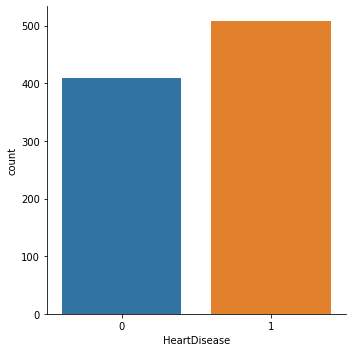

In [12]:

sns.catplot(x='HeartDisease', data = dataset, kind = 'count')

In [13]:
from sklearn.preprocessing import LabelEncoder
dataset['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [14]:
for col in dataset.columns:
    if col=='ST_Slope':
        dataset[col] = dataset[col].apply(lambda x: 0 if x=='Flat' else (1 if x=='Up' else -1))
    elif dataset.dtypes[col]=='object':
        dataset[col] = LabelEncoder().fit_transform(dataset[col])

In [15]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,1,0
1,49,0,2,160,180,0,1,156,0,1.0,0,1
2,37,1,1,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,1,108,1,1.5,0,1
4,54,1,2,150,195,0,1,122,0,0.0,1,0


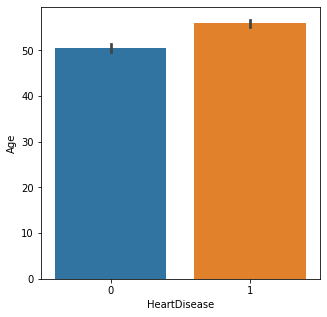

In [20]:
#  age vs HeartDisease
plot = plt.figure(figsize=(5,5))
sns.barplot(x='HeartDisease', y = 'Age', data = dataset)

In [21]:

# plot = plt.figure(figsize=(5,5))
# sns.barplot(x='Age', y = 'HeartDisease', data = dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [22]:
correlation = dataset.corr()

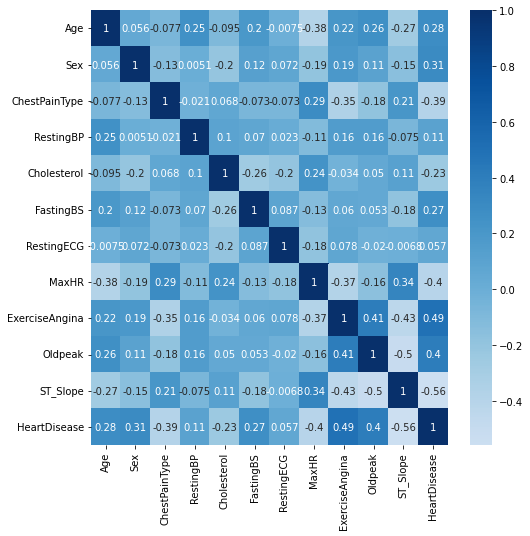

In [27]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), xticklabels=dataset.corr().columns, yticklabels=dataset.corr().columns, cmap='Blues', center=0, annot=True)

Data Preprocessing

In [59]:
# separate the data and Label
X = dataset[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'MaxHR','ExerciseAngina', 'Oldpeak']]
X

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,40,1,1,140,0,172,0,0.0
1,49,0,2,160,0,156,0,1.0
2,37,1,1,130,0,98,0,0.0
3,48,0,0,138,0,108,1,1.5
4,54,1,2,150,0,122,0,0.0
...,...,...,...,...,...,...,...,...
913,45,1,3,110,0,132,0,1.2
914,68,1,0,144,1,141,0,3.4
915,57,1,0,130,0,115,1,1.2
916,57,0,1,130,0,174,0,0.0


Label Binarizaton

In [60]:
Y = dataset['HeartDisease']

In [61]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


Train & Test Split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [63]:
print(Y.shape, Y_train.shape, Y_test.shape)

(918,) (734,) (184,)


Model Training:

Random Forest Classifier

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [66]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [67]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8695652173913043


Building a Predictive System

In [69]:
input_data = (40,1,1,160,0,98,0,0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Your heart is at risk, Consult a doctor immideately')
else:
  print('Healthy condition, But remember to maintain fitness')

[0]
Healthy condition, But remember to maintain fitness


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
file='boby'
pickle.dump(model(file,'wb'))